In [21]:
import warnings
warnings.filterwarnings(action='ignore')

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data=pd.read_csv("C:\\Users\\Rohit\\Untitled Folder\\house_prices.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [41]:
data.shape

(21613, 21)

In [5]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

To observe Outliers

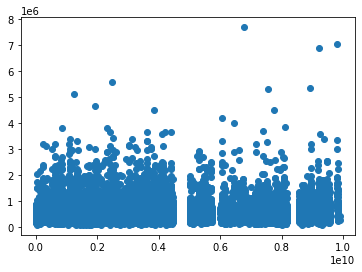

In [16]:
x=data['ID']
y=data['Sale Price']

plt.scatter(x,y)

Importing Seaborn library for Box and whisker plot

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Sale Price'>

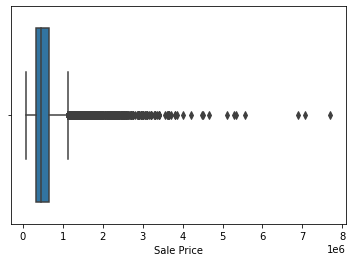

In [22]:
y=data['Sale Price']
sns.boxplot(y)

Interquartile Range

In [24]:
q1=data['Sale Price'].quantile(0.25)  #first quartile
q3=data['Sale Price'].quantile(0.75)  #third quartile

In [26]:
iqr=q3-q1
iqr

323050.0

In [28]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

upper_limit,lower_limit

(1129575.0, -162625.0)

Replacing Outliers

In [29]:
#first create function

def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [30]:
data['Sale Price']=data['Sale Price'].apply(limit_imputer)

<AxesSubplot:xlabel='Sale Price'>

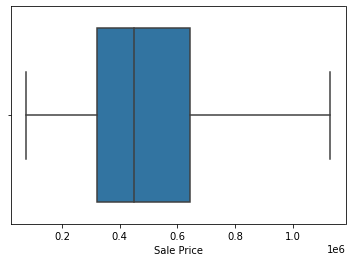

In [32]:
sns.boxplot(data['Sale Price']) # here we observe no outliers in the sale price

Treating of Missing Values

In [35]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [52]:
#drops the row which has  null values in the Sale price column

data.dropna(inplace=True,axis=0,subset=['Sale Price'])


(array([1.9017e+04, 2.1420e+03, 3.2200e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

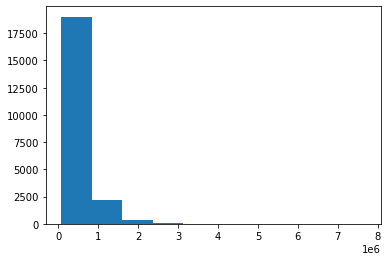

In [54]:
plt.hist(data['Sale Price'],bins=10)